
# Project: Investigate a Dataset - [Patients No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

### Dataset Description 
We have a csv file contains the data we are going to analyze



### Question(s) for Analysis

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [5]:
# import statements for all of packages that we plan to use.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as snb
% matplotlib inline


In [8]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 4.4MB/s eta 0:00:01   16% |█████▏                          | 1.7MB 26.4MB/s eta 0:00:01    47% |███████████████▏                | 5.0MB 33.6MB/s eta 0:00:01    63% |████████████████████▏           | 6.6MB 31.5MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.8MB/s eta 0:00:01   33% |██████████▋                     | 4.5MB 28.3MB/s eta 0:00:01    43% |██████████████                  | 5.9MB 26.0MB/s eta 0:00:01    85% |███████████████████████████▎    | 11.4MB 29.1MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, then trim and clean dataset for analysis.

### General Properties


In [12]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# exploring the shape of data
df.shape

(110527, 14)

In [14]:
# check for duplications
df.duplicated().sum()

0

In [15]:
# check the number of unique values
df["PatientId"].nunique()

62299

In [16]:
# check the number of duplicated Patients Ids
df["PatientId"].duplicated().sum()


48228

In [17]:
# check the number of duplicated Patients Ids and No show
df.duplicated(["PatientId", "No-show"]).sum()

38710

In [18]:
# inspection for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [19]:
# getting some informations about our data 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [20]:
# identifying the row index of -1 value for the age 
mask = df.query('Age == "-1"')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning

 

In [21]:
# Removing the -1 value for age
df.drop(index = 99832, inplace = True)


In [22]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [23]:
# correction of columns names
df.rename(columns={"Hipertension": "Hypertension"}, inplace= True)
df.rename(columns={"No-show": "No_show"}, inplace= True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [24]:
# Removing duplicated Ids and duplicated showing status
df.drop_duplicates(["PatientId", "No_show"], inplace= True)
df.shape

(71816, 14)

In [25]:
# Removing unnecessary data
df.drop(["PatientId","AppointmentID", "ScheduledDay", "AppointmentDay"],axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data wrangling summary
After gathering the data from csv file we explored the first few rows of the dataset set to the it's general properties, then we showed the dimensions of our data, then we chacked if there were any duplicated appointments, then explored if there was duplicated patients Ids and removed them.


<a id='eda'></a>
## Exploratory Data Analysis

Now ready to move on to exploration computing statistics and creating visualizations with the goal of addressing the research questions that you posed in the introduction section.   



## General look

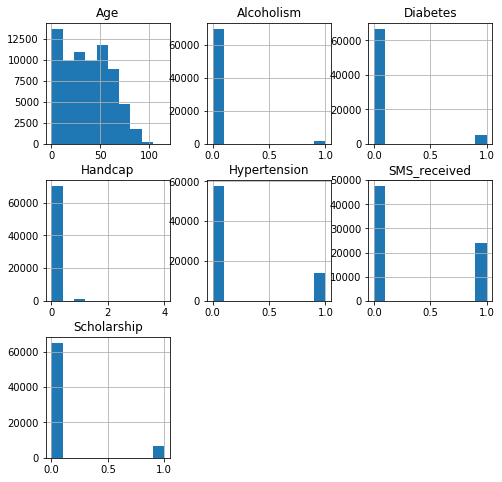

In [26]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize= (8,8));

In [27]:
# dividing the patients to 2 groups : show or noshow then exploring them
show = df.No_show == "No"
noshow = df.No_show == "Yes"
df[show].count(), df[noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

In [29]:
df[show].mean(), df[noshow].mean()

(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

### Investigation for influencing factors on the attendance rate

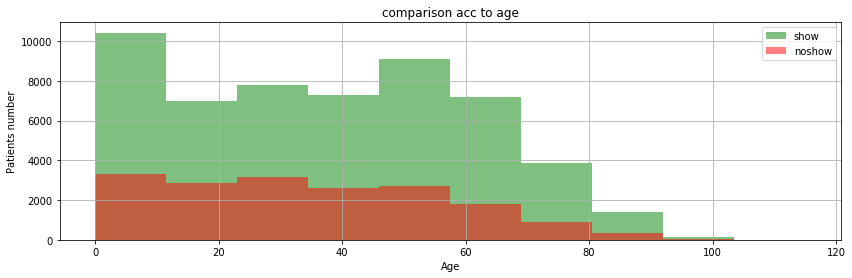

In [26]:
# does age affect the attendance
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[14,4])
    df[col_name][show].hist(alpha= 0.5, bins= 10, color= "green", label= "show")
    df[col_name][noshow].hist(alpha= 0.5, bins= 10, color= "red", label= "noshow")
    plt.legend();
    plt.title("comparison acc to age")
    plt.xlabel("Age")
    plt.ylabel("Patients number");
attendance(df,"Age",show,noshow)    


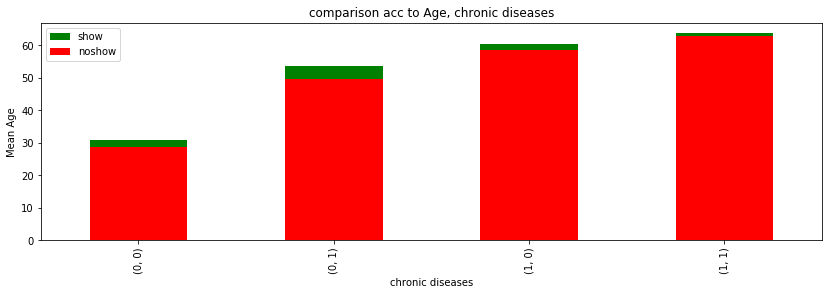

In [28]:
# does age and chronic diseases affect the attendance together
plt.figure(figsize=[14,4])
df[show].groupby(["Hypertension","Diabetes"]).mean()["Age"].plot(kind= "bar",color= "green",label="show")
df[noshow].groupby(["Hypertension","Diabetes"]).mean()["Age"].plot(kind= "bar",color= "red",label="noshow")
plt.legend();
plt.title("comparison acc to Age, chronic diseases")
plt.xlabel("chronic diseases")
plt.ylabel("Mean Age");

In [29]:
df[show].groupby(["Hypertension","Diabetes"]).mean()["Age"], df[noshow].groupby(["Hypertension","Diabetes"]).mean()["Age"]

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

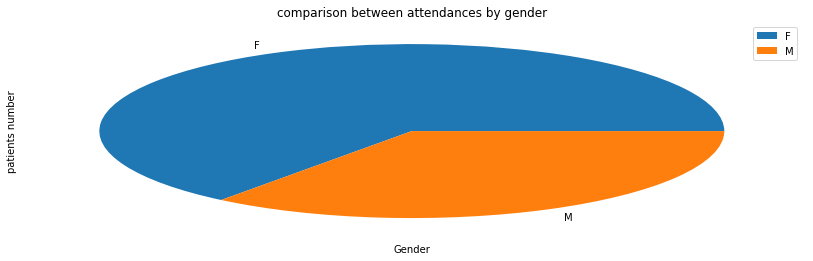

In [30]:
# what is percentage of sexs attending
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[14,4])
    df[col_name][show].value_counts(normalize=True).plot(kind="pie", label= "show")
    plt.legend();
    plt.title("comparison between attendances by gender")
    plt.xlabel("Gender")
    plt.ylabel("patients number")
attendance(df,"Gender",show,noshow) 



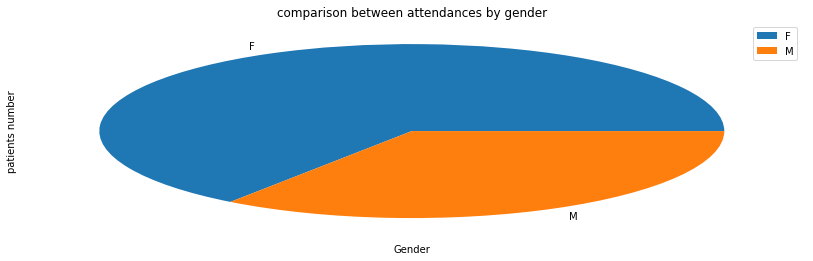

In [32]:
# what is percentage of sexs absent
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[14,4])
    df[col_name][noshow].value_counts(normalize=True).plot(kind="pie", label= "noshow")
    plt.legend();
    plt.title("comparison between attendances by gender")
    plt.xlabel("Gender")
    plt.ylabel("patients number")
attendance(df,"Gender",show,noshow) 

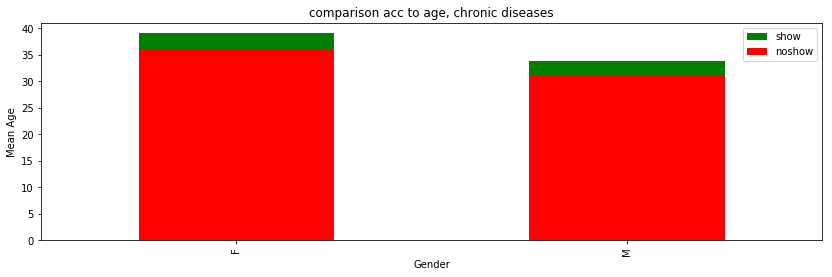

In [33]:
# does age and chronic gender affect the attendance together
plt.figure(figsize=[14,4])
df[show].groupby("Gender").Age.mean().plot(kind="bar", color="green", label="show")
df[noshow].groupby("Gender").Age.mean().plot(kind="bar", color="red", label="noshow")
plt.legend();
plt.title("comparison acc to age, chronic diseases")
plt.xlabel("Gender")
plt.ylabel("Mean Age");


In [34]:
df[show].groupby(["Gender"]).mean()["Age"], df[noshow].groupby(["Gender"]).mean()["Age"]

(Gender
 F    39.130292
 M    33.766269
 Name: Age, dtype: float64, Gender
 F    36.06501
 M    31.22040
 Name: Age, dtype: float64)

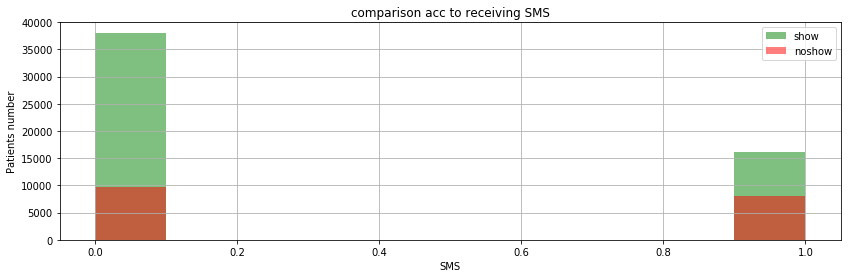

In [35]:
# does receiving SMS affect the attendance
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[14,4])
    df[col_name][show].hist(alpha= 0.5, bins= 10, color= "green", label= "show")
    df[col_name][noshow].hist(alpha= 0.5, bins= 10, color= "red", label= "noshow")
    plt.legend();
    plt.title("comparison acc to receiving SMS")
    plt.xlabel("SMS")
    plt.ylabel("Patients number");
attendance(df,"SMS_received",show,noshow)    


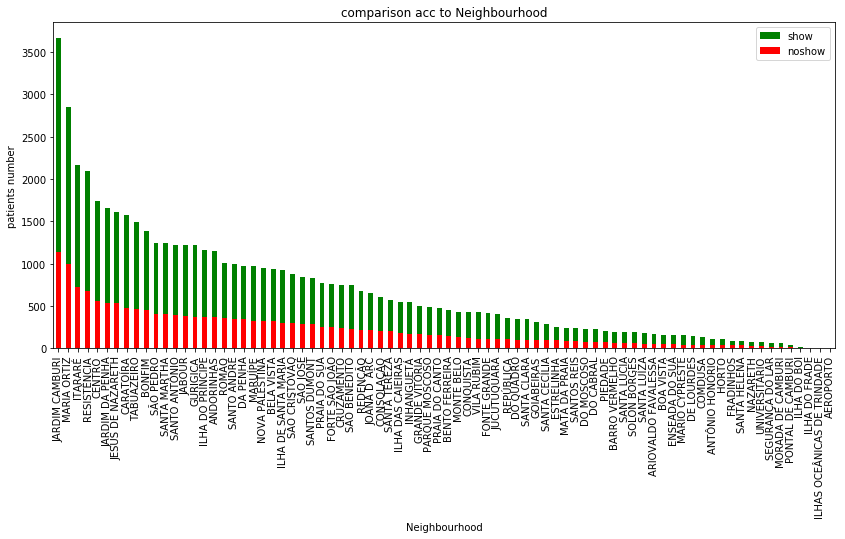

In [40]:
# does Neighbourhood affect the attendance
plt.figure(figsize=[14,6])
df.Neighbourhood[show].value_counts().plot(kind="bar", color="green", label="show")
df.Neighbourhood[noshow].value_counts().plot(kind="bar", color="red", label="noshow")
plt.legend()
plt.title("comparison acc to Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("patients number");



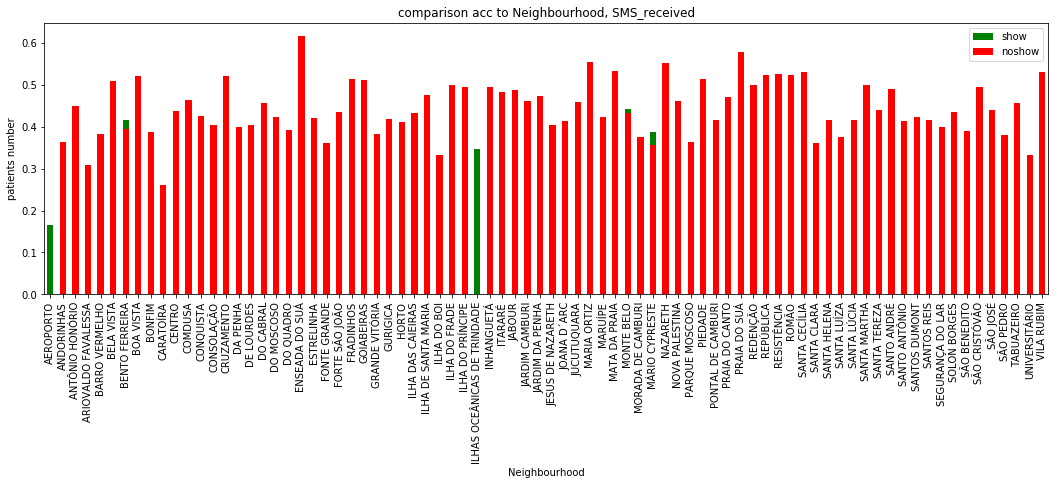

In [46]:
plt.figure(figsize=[18,5])
df[show].groupby("Neighbourhood").SMS_received.mean().plot(kind="bar", color="green", label="show")
df[noshow].groupby("Neighbourhood").SMS_received.mean().plot(kind="bar", color="red", label="noshow")
plt.legend();
plt.title("comparison acc to Neighbourhood, SMS_received")
plt.xlabel("Neighbourhood")
plt.ylabel("patients number");

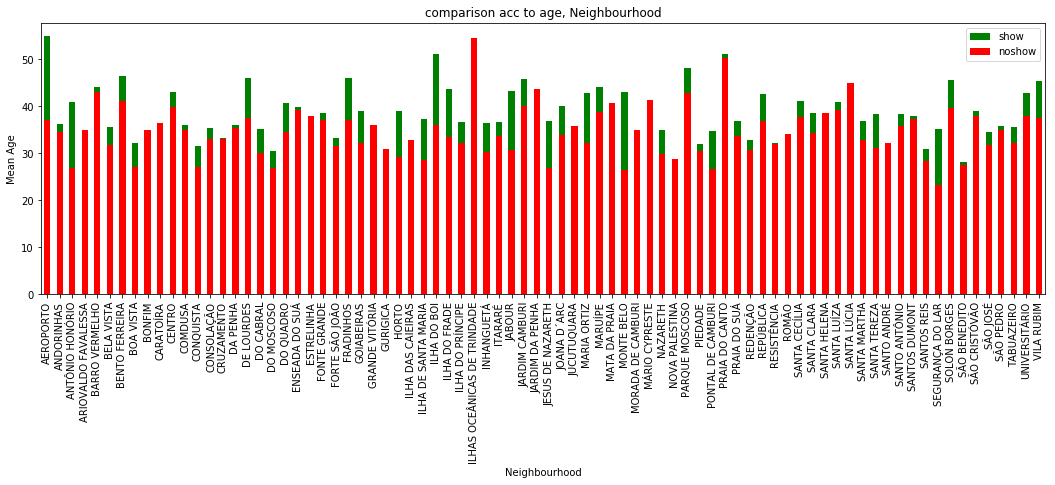

In [47]:
plt.figure(figsize=[18,5])
df[show].groupby("Neighbourhood").Age.mean().plot(kind="bar", color="green", label="show")
df[noshow].groupby("Neighbourhood").Age.mean().plot(kind="bar", color="red", label="noshow")
plt.legend();
plt.title("comparison acc to age, Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Mean Age");

<a id='conclusions'></a>
## Conclusions

At the end we can say that Neighbourhood is strongly related to the patients showing up at clinic.

Number of showing patients from specific Neighbourhood affected by receiving SMS and Ages.

Age also has it's role as those in the 0-10 age group were the most to show up, followed by the age group 35-70.

Number of showing patients without receiving SMS is greater than showing patients with receiving SMS, which means that we need to revisit our SMS compaghin. 


## Limitations

Could not detect direct corrolation between patients showing/no-showing and many characteristics such as gender, chronic diseases, disabilities.  

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0